In [273]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import math
import logging
import numpy as np
import seaborn as sns
from fontTools.misc.plistlib import end_key

import index_definition
import index_utils as ai
from confidence_index import get_index_cut_by_time
from model.train_online_model import predict, generate_live_match_data
import warnings
import common
import random
import dill
import confidence_index as ci
import feature_utils
# 忽略所有警告
warnings.filterwarnings("ignore")
%reset -f  # 清除变量和内核状态
np.random.seed(42)
random.seed(42)

Don't know how to reset  #, please run `%reset?` for details
Don't know how to reset  清除变量和内核状态, please run `%reset?` for details


In [274]:
# data = pd.read_csv("Linhac24-25_Sportlogiq.csv")
# data['is_first_goal'] = None
# data['winnerid'] = None
# data['is_visit_win'] = None
# data['is_first_faceoff'] = None
# 
# 
# def add_first_goal_label(df):
#     previous_finished_game_id = None
#     def add_label(row):
#         nonlocal previous_finished_game_id 
#         current_gameid = row['gameid']
#         if (abs(row['scoredifferential'])) == 1 and  previous_finished_game_id != current_gameid:
#             winner = common.get_winner(data, current_gameid)
#             #不包括平局，如果第一个进球的没有赢，即是是平局，也算输掉比赛
#             winnerid = winner[0] if winner[2] is True else winner[1]
#             #如果是平局，winnerid 就是平局的队伍
#             is_visit_win = 1 if row['ishomegame'] == 0 and winnerid == row['teamid'] else (1 if row['ishomegame'] == 1 and winnerid != row['teamid'] else 0)
#             previous_finished_game_id = current_gameid
#             return [1 , winnerid, is_visit_win]
#         return [None, None, None]
#     df[['is_first_goal', 'winnerid','is_visit_win']] = df.apply(add_label,axis=1, result_type='expand')
#     return df
# 
# data = add_first_goal_label(data)
# first_goal_df = data[data['is_first_goal'] == 1]
# visit_win_rate = len(first_goal_df[first_goal_df['is_visit_win'] == 1]) / len(first_goal_df)
# home_win_rate = len(first_goal_df[first_goal_df['is_visit_win'] == 0]) / len(first_goal_df)
# winner_first_goal_number = len(first_goal_df[first_goal_df['teamid'] == first_goal_df['winnerid']])
# winner_first_goal_rate = winner_first_goal_number / len(data['gameid'].unique().tolist())
# #common.get_winner(data,)
# print('所有比赛中，主场队伍赢得比赛占比:',home_win_rate)
# print('所有比赛中，客场队伍赢得比赛占比:',visit_win_rate)
# print('所有比赛中，第一个进球的队伍赢得比赛占比:', winner_first_goal_rate)   

In [275]:
#客场队伍赢球概率




In [276]:
# #再比赛前9分钟中，取得第一个进球的队伍赢得比赛占比
# 
# def calculate_game_win_rate(df, tfrom , to):
# 
#     first_goal_9min_df = df[(df['is_first_goal'] == 1)  & (df['compiledgametime'] <= to)   & (df['compiledgametime'] > tfrom)]
#     winner_first_goal_9min_number = len(first_goal_9min_df[first_goal_9min_df['teamid'] == first_goal_9min_df['winnerid']])
#     winner_first_goal_9min_rate = winner_first_goal_9min_number / len(first_goal_9min_df['gameid'].unique().tolist())
#     print("从{} 到{}，第一个进球的队伍赢得比赛占比:{}, 赢的场数:{},总场数:{}".format(tfrom, to,winner_first_goal_9min_rate,winner_first_goal_9min_number,
#                                                                                                  len(first_goal_9min_df['gameid'].unique().tolist()))) 
# calculate_game_win_rate(first_goal_df, 0, 900)

In [277]:
# home_first_goal_df =  first_goal_df[first_goal_df['ishomegame'] == 0]
# calculate_game_win_rate(home_first_goal_df, 0, 900)
# 


In [278]:
# 总冠军的客场赢球概率其实也很低


In [279]:
# faceoff_df_1 = data[(data['eventname'] == 'faceoff') &  (data['compiledgametime'] == 0)]
# faceoff_df_2 = data[(data['eventname'] == 'faceoff') &  (data['compiledgametime'] == 1200)]
# faceoff_df_3 = data[(data['eventname'] == 'faceoff') &  (data['compiledgametime'] == 2400)]
# 
# faceoff_succ_df_1 = faceoff_df_1[faceoff_df_1['outcome'] == 'successful']
# faceoff_succ_df_2 = faceoff_df_2[faceoff_df_2['outcome'] == 'successful']
# faceoff_succ_df_3 = faceoff_df_3[faceoff_df_3['outcome'] == 'successful']
# 
# # print(len(faceoff_succ_df_1))
# # print(len(faceoff_succ_df_2))
# # print(len(faceoff_succ_df_3))
# 
# def add_winner_label(df):
#     def add_label(row):
#         current_gameid = row['gameid']
#         winner = common.get_winner(data, current_gameid)
#         winnerid = winner[0] if winner[2] is True else winner[1]
#         loserid = winner[1] if winner[2] is True else winner[0]
#         return [winnerid,loserid]
#     df[['winnerid','loserid']] = df.apply(add_label,axis=1,result_type='expand')
#     return df
# add_winner_label(faceoff_succ_df_1)
# add_winner_label(faceoff_succ_df_2)
# add_winner_label(faceoff_succ_df_3)
# 
# faceoff_succ_win_1 = faceoff_succ_df_1[faceoff_succ_df_1['winnerid'] == faceoff_succ_df_1['teamid']]
# faceoff_succ_win_2 = faceoff_succ_df_2[faceoff_succ_df_2['winnerid'] == faceoff_succ_df_2['teamid']]
# faceoff_succ_win_3 = faceoff_succ_df_3[faceoff_succ_df_3['winnerid'] == faceoff_succ_df_3['teamid']]
# 
# print('赢得1场faceoff队伍赢得比赛:',len(faceoff_succ_win_1),'赢比赛的概率:',len(faceoff_succ_win_1) / len(faceoff_succ_df_1))
# print('赢得2场faceoff队伍赢得比赛:',len(faceoff_succ_win_2),'赢比赛的概率:',len(faceoff_succ_win_2) / len(faceoff_succ_df_2))
# print('赢得3场faceoff队伍赢得比赛:',len(faceoff_succ_win_3),'赢比赛的概率:',len(faceoff_succ_win_3) / len(faceoff_succ_df_3))


In [280]:
# faceoff_df = pd.concat([faceoff_succ_df_1,faceoff_succ_df_2,faceoff_succ_df_3],axis=0)


In [281]:
hy = pd.read_csv("data/Linhac24-25_Sportlogiq.csv")
#hy = hy[ (hy['period'] == 2)]
hy = hy[ (hy['period'] != 4)]
hy['is_offside'] = (hy['eventname'] == 'offside')
hy['is_goal'] = (hy['eventname'] == 'goal')
hy['is_shot'] = hy['eventname'] == 'shot'
hy['is_faceoff_win'] = (hy['eventname'] == 'faceoff') & (hy['outcome'] == 'successful') & (hy['compiledgametime'] == 0)
hy['is_lpr_win'] = (hy['eventname'] == 'lpr') & (hy['outcome'] == 'successful')
hy['is_check'] = hy['eventname'] == 'check'
hy['is_powerplay'] = (hy['manpowersituation'] == 'powerPlay')
hy['is_puckprotection'] = (hy['eventname'] == 'puckprotection') & (hy['outcome'] == 'successful')
hy['is_controlledentryagainst'] = (hy['eventname'] == 'controlledentryagainst') & (hy['outcome'] == 'successful')
hy['is_penaltydrawn'] = (hy['eventname'] == 'penaltydrawn')

first_penalty_drawn = hy[hy['eventname'] == 'penaltydrawn'].sort_values(['gameid', 'compiledgametime']).groupby(['gameid'],as_index=False).first()[['gameid', 'compiledgametime','teamid','is_penaltydrawn','eventname']]
first_powerplay = hy[hy['is_powerplay']].sort_values(['gameid', 'compiledgametime']).groupby(['gameid'],as_index=False).first()[['gameid', 'compiledgametime','teamid','is_powerplay','manpowersituation']]
first_check =  hy[hy['is_check']].sort_values(['gameid', 'compiledgametime']).groupby(['gameid'],as_index=False).first()[['gameid', 'compiledgametime','teamid','is_check','eventname']]
first_shot =  hy[hy['is_shot']].sort_values(['gameid', 'compiledgametime']).groupby(['gameid'],as_index=False).first()[['gameid', 'compiledgametime','teamid','is_shot','eventname']]
first_goal =  hy[hy['is_goal']].sort_values(['gameid', 'compiledgametime']).groupby(['gameid'],as_index=False).first().reset_index()[['gameid', 'compiledgametime','teamid','is_goal','eventname']]
first_faceoff_win = hy[hy['is_faceoff_win']].sort_values(['gameid', 'compiledgametime']).groupby(['gameid'],as_index=False).first().reset_index()[['gameid', 'compiledgametime','teamid','is_faceoff_win','eventname','outcome']]
first_lpr_win = hy[hy['is_lpr_win']].sort_values(['gameid', 'compiledgametime']).groupby(['gameid'],as_index=False).first().reset_index()[['gameid', 'compiledgametime','teamid','is_lpr_win','eventname','outcome']]
first_puckprotection = hy[hy['is_puckprotection']].sort_values(['gameid', 'compiledgametime']).groupby(['gameid'],as_index=False).first().reset_index()[['gameid', 'compiledgametime','teamid','is_puckprotection','eventname','outcome']]
first_controlledentryagainst = hy[hy['is_controlledentryagainst']].sort_values(['gameid', 'compiledgametime']).groupby(['gameid'],as_index=False).first().reset_index()[['gameid', 'compiledgametime','teaminpossession','is_controlledentryagainst','eventname','outcome']]
first_controlledentryagainst.rename(columns={'teaminpossession': 'teamid'}, inplace=True)
first_offside = hy[hy['is_offside']].sort_values(['gameid', 'compiledgametime']).groupby(['gameid'],as_index=False).first().reset_index()[
    ['gameid', 'compiledgametime', 'teamid', 'is_offside', 'eventname', 'outcome']]

In [282]:
def add_label(row):
    current_gameid = row['gameid']
    winner = common.get_winner(hy, current_gameid)
    is_pin = True if winner[2] is False else False
    winnerid = winner[0] if winner[2] is True else winner[1]
    loserid = winner[1] if winner[2] is True else winner[0]
    return [winnerid,is_pin,loserid]
 
def add_winner_label(df):
    df[['winnerid','is_pin','loserid']] = df.apply(add_label,axis=1, result_type='expand')
    return df


    


In [283]:
def vectorize_col(df,col):

    df[col] = df[col].astype(int)
    # 选择需要的列
    return df[['gameid', 'teamid', col]]

def add_home_game_label(row):
    team_id = row['teamid']
    home_team_id = common.get_home_team_id(hy, row['gameid'])
    return 'home' if team_id == home_team_id else 'away'
def add_home_win_label(row):
    gameid = row.name
    winner = common.get_winner(hy, gameid)
    home_team_id = common.get_home_team_id(hy, gameid)
    winnerid = winner[0] if winner[2] is True else winner[1]
    return 1 if home_team_id == winnerid else 0  

vec_first_event = pd.DataFrame()
vec_first_penaltydrawn = vectorize_col(first_penalty_drawn,'is_penaltydrawn')
vec_first_powerplay = vectorize_col(first_powerplay,'is_powerplay')
vec_first_check = vectorize_col(first_check,'is_check')
vec_first_shot = vectorize_col(first_shot,'is_shot')
vec_first_goal = vectorize_col(first_goal,'is_goal')
vec_first_faceoff_win = vectorize_col(first_faceoff_win,'is_faceoff_win')
vec_first_lpr_win = vectorize_col(first_lpr_win,'is_lpr_win')
vec_first_puckprotection = vectorize_col(first_puckprotection,'is_puckprotection')
vec_first_controlledentryagainst = vectorize_col(first_controlledentryagainst,'is_controlledentryagainst')
vec_first_offside = vectorize_col(first_offside,'is_offside')
#合并上述所有向量
vec_first_event = pd.merge(vec_first_offside, vec_first_powerplay, on=['gameid', 'teamid'], how='outer')
vec_first_event = pd.merge(vec_first_event, vec_first_check, on=['gameid', 'teamid'], how='outer')
vec_first_event = pd.merge(vec_first_event, vec_first_shot, on=['gameid', 'teamid'], how='outer')
vec_first_event = pd.merge(vec_first_event, vec_first_goal, on=['gameid', 'teamid'], how='outer')
vec_first_event = pd.merge(vec_first_event, vec_first_faceoff_win, on=['gameid', 'teamid'], how='outer')
vec_first_event = pd.merge(vec_first_event, vec_first_lpr_win, on=['gameid', 'teamid'], how='outer')
vec_first_event = pd.merge(vec_first_event, vec_first_puckprotection, on=['gameid', 'teamid'], how='outer')
vec_first_event = pd.merge(vec_first_event, vec_first_controlledentryagainst, on=['gameid', 'teamid'], how='outer')
vec_first_event = pd.merge(vec_first_event, vec_first_penaltydrawn, on=['gameid', 'teamid'], how='outer')
vec_first_event = vec_first_event.fillna(0)
vec_first_event['is_home_game'] =vec_first_event.apply(add_home_game_label, axis=1)
#删掉gameid == 61508这一行
vec_first_event = vec_first_event[vec_first_event['gameid'] != 61508]
# vec_first_event['is_home_game'] = vec_first_event.groupby('gameid').cumcount().map({0: 'home', 1: 'away'})
home_df = vec_first_event[vec_first_event['is_home_game'] == 'home'].set_index('gameid')
away_df = vec_first_event[vec_first_event['is_home_game'] == 'away'].set_index('gameid')

# 确保两个数据集按gameid对齐
home_df, away_df = home_df.align(away_df, join='inner', axis=0, fill_value=0)

# 计算差值（主队 - 客队）
diff_df = home_df.drop(columns=['teamid', 'is_home_game']) - away_df.drop(columns=['teamid', 'is_home_game'])
diff_df['home_win'] = diff_df.apply(add_home_win_label, axis=1)
diff_df

,is_offside,is_powerplay,is_check,is_shot,is_goal,is_faceoff_win,is_lpr_win,is_puckprotection,is_controlledentryagainst,is_penaltydrawn,home_win
gameid,,,,,,,,,,,
60062,1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1
60116,-1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,1.0,0
60266,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
60592,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,1.0,1.0,1
60626,1.0,-1.0,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,-1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
88291,1.0,1.0,-1.0,1.0,-1.0,1.0,1.0,1.0,-1.0,1.0,0
88582,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,0
89267,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,0


In [308]:
import shap
from sklearn.metrics import roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, learning_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (accuracy_score, f1_score, roc_auc_score, 
                             confusion_matrix, RocCurveDisplay, PrecisionRecallDisplay)
#X = diff_df.drop(columns=['home_win','is_check','is_lpr_win','is_puckprotection'])
X = diff_df.drop(columns=['home_win','is_penaltydrawn','is_controlledentryagainst','is_lpr_win','is_offside']) 
#X #= diff_df.drop(columns=['home_win'])   
features= X.columns.tolist()
#X = diff_df.drop(columns=['home_win'])   

y = diff_df['home_win']

# 1. 数据划分与SMOTE处理
X_train, X_val, y_train, y_val = train_test_split(
    X, y, 
    test_size=0.2, 
    stratify=y, 
    random_state=42
)

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# 2. 模型训练与交叉验证
class_weights = {0: 1, 1: 0.7}
lr = LogisticRegression(class_weight=class_weights, max_iter=500, random_state=42)

# 交叉验证（优化：分层K折）
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(lr, X_resampled, y_resampled, cv=cv, scoring='f1')
print(f"逻辑回归 F1 均值: {scores.mean():.3f} (±{scores.std():.3f})")

# 3. 测试集评估
y_pred = lr.fit(X_resampled, y_resampled).predict(X_val)
y_proba = lr.predict_proba(X_val)[:, 1]




逻辑回归 F1 均值: 0.567 (±0.074)


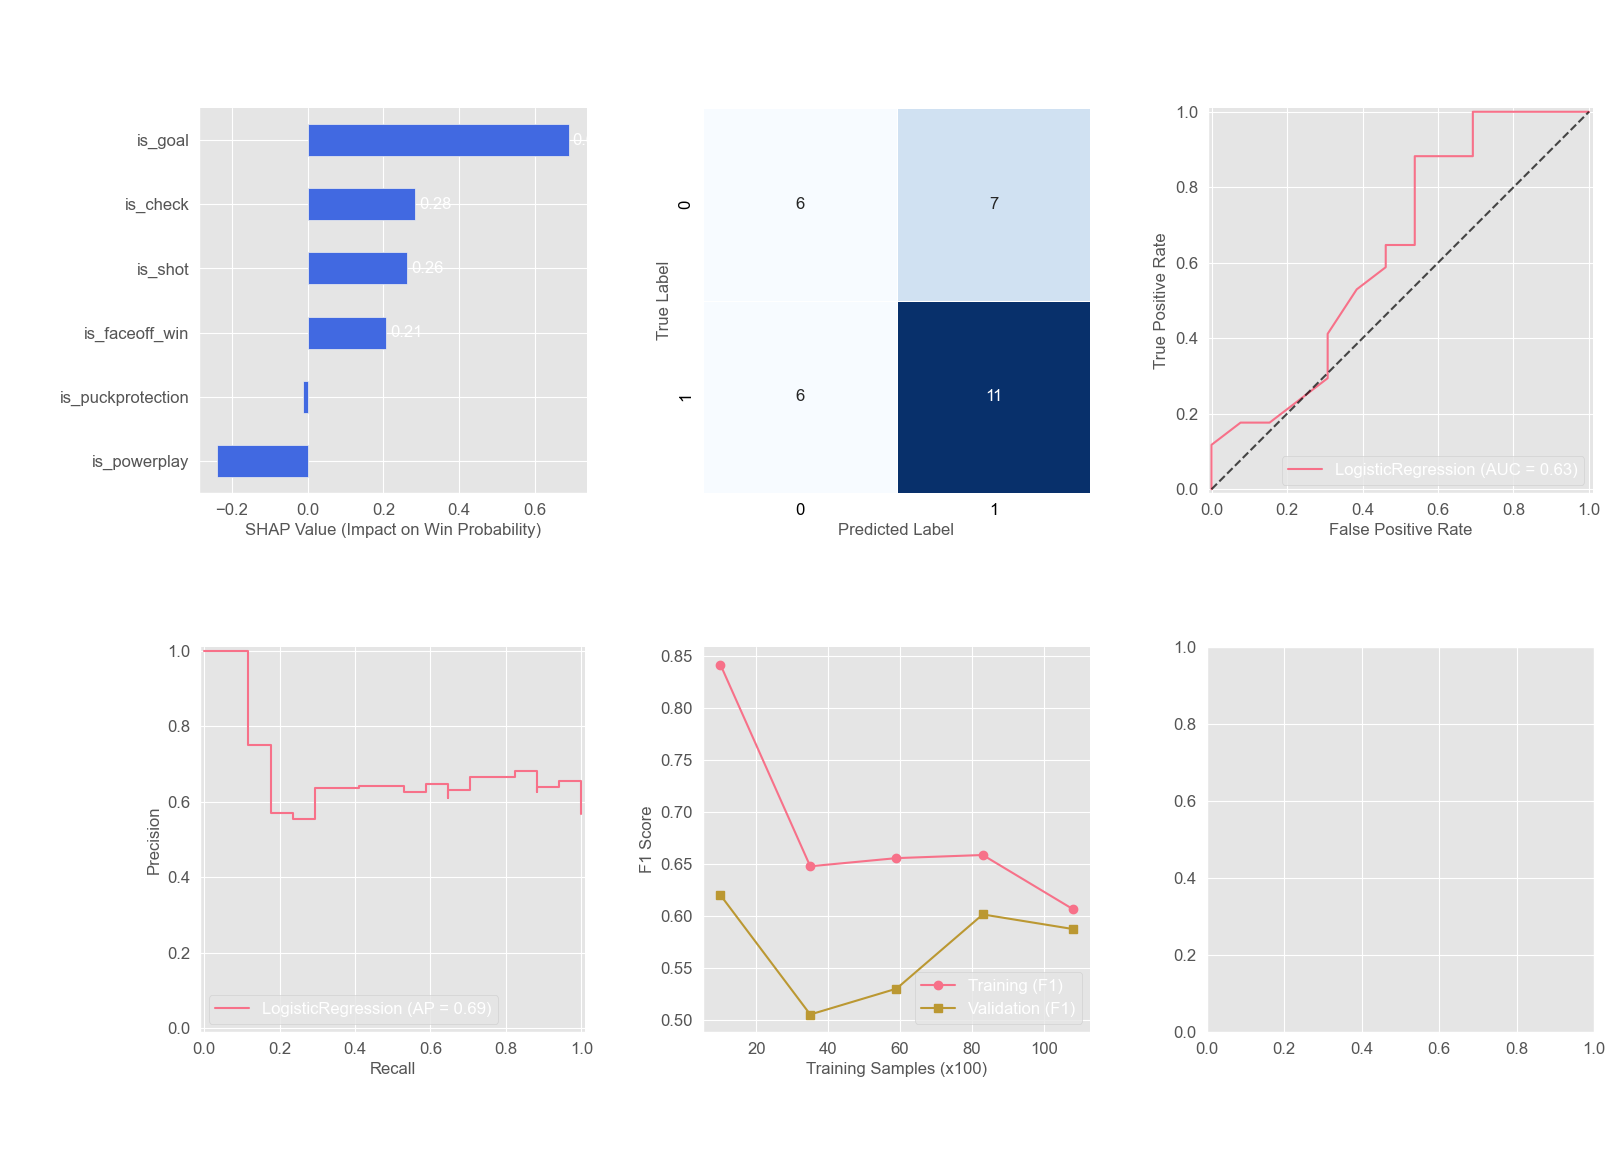

In [312]:
from sklearn.metrics import average_precision_score
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')  # 替换 'seaborn-paper'
sns.set_palette("husl")         # 高对比度色系
plt.rcParams['font.size'] = 12  # 统一字体大小


fig = plt.figure(figsize=(18, 12))
grid = plt.GridSpec(2, 3, figure=fig, hspace=0.4, wspace=0.3)



ax1 = fig.add_subplot(grid[0, 0])  # 特征重要性
ax2 = fig.add_subplot(grid[0, 1])  # 混淆矩阵
ax3 = fig.add_subplot(grid[0, 2])  # ROC曲线


ax4 = fig.add_subplot(grid[1, 0])  # PR曲线
ax5 = fig.add_subplot(grid[1, 1])  # 学习曲线
ax6 = fig.add_subplot(grid[1, 2])  # 特征交互（示例）



importances = pd.Series(lr.coef_[0], index=X.columns)
top_features = importances.sort_values(ascending=False).head(15)
top_features.plot(kind='barh', ax=ax1, color='royalblue')
ax1.invert_yaxis()
ax1.set_title("Feature Importance (Top 15)", fontsize=14, pad=20)
ax1.set_xlabel("SHAP Value (Impact on Win Probability)", fontsize=12)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
# 标注关键特征（示例）
for i, v in enumerate(top_features):
    if v > 0.1:  # 高重要性阈值
        ax1.text(v + 0.01, i, f'{v:.2f}', va='center')

# 2. 混淆矩阵 (中上)
cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            ax=ax2, cbar=False, linewidths=0.5)
ax2.set_title("Confusion Matrix", fontsize=14, pad=20)
ax2.set_xlabel("Predicted Label", fontsize=12)
ax2.set_ylabel("True Label", fontsize=12)
ax2.tick_params(axis='both', colors='black')

# 3. ROC曲线 (右上)
RocCurveDisplay.from_estimator(lr, X_val, y_val, ax=ax3)
ax3.plot([0,1], [0,1], 'k--', alpha=0.7)  # 随机猜测基线
ax3.set_title("ROC Curve (AUC = {:.3f})".format(roc_auc_score(y_val, y_proba)), 
              fontsize=14, pad=20)
ax3.set_xlabel("False Positive Rate", fontsize=12)
ax3.set_ylabel("True Positive Rate", fontsize=12)
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)

# 4. PR曲线 (左下)
PrecisionRecallDisplay.from_estimator(lr, X_val, y_val, ax=ax4)
ax4.set_title("Precision-Recall Curve (AP = {:.3f})".format(
    average_precision_score(y_val, y_proba)), 
    fontsize=14, pad=20)
ax4.set_xlabel("Recall", fontsize=12)
ax4.set_ylabel("Precision", fontsize=12)
ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)

# 5. 学习曲线 (右下)
train_sizes, train_scores, val_scores = learning_curve(
    lr, X_resampled, y_resampled, cv=5, 
    scoring='f1', train_sizes=np.linspace(0.1, 1.0, 5))
ax5.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', 
         label="Training (F1)")
ax5.plot(train_sizes, np.mean(val_scores, axis=1), 's-', 
         label="Validation (F1)")
ax5.set_title("Learning Curve", fontsize=14, pad=20)
ax5.set_xlabel("Training Samples (x100)", fontsize=12)
ax5.set_ylabel("F1 Score", fontsize=12)
ax5.legend(loc='lower right')
ax5.spines['top'].set_visible(False)
ax5.spines['right'].set_visible(False)

# 6. 特征交互示例 (右下备用)
# 此处可添加SHAP交互值可视化（需安装shap库）
# explainer = shap.TreeExplainer(lr)
# shap_values = explainer.shap_interaction_values(X_val)
# shap.dependence_plot("is_powerplay", shap_values, X_val, ax=ax6)

# ======================
# 底部注释与页脚
# ======================
fig.text(0.5, 0.02, "Data Source: NHL Play-by-Play Dataset (2010-2023)", 
         ha='center', fontsize=10, alpha=0.7)
plt.figtext(0.02, 0.95, "Model: Logistic Regression with SMOTE", 
            fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

In [285]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=50,
    class_weight=class_weights,
    max_depth=4,
    random_state=42
)
rf.fit(X_resampled, y_resampled)

# 特征重要性分析
importances = pd.Series(rf.feature_importances_, index=X.columns)
print(importances.sort_values(ascending=False))


is_goal              0.280743
is_powerplay         0.171852
is_faceoff_win       0.157314
is_shot              0.150122
is_check             0.129028
is_puckprotection    0.110941
dtype: float64


In [305]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (roc_auc_score, confusion_matrix, 
                             RocCurveDisplay, PrecisionRecallDisplay,
                             accuracy_score, f1_score)
from sklearn.model_selection import train_test_split, learning_curve
import numpy as np
import pandas as pd

def plot_model_evaluation(
    model,         # 训练好的模型对象
    X,             # 特征数据
    y,             # 目标变量
    class_names,   # 类别标签 ['类别0', '类别1']
    feature_names=None,  # 特征名称列表（可选）
    figsize=(18, 12),    # 图表尺寸
    style='dark_background',  # 样式主题
    palette='Blues_r'    # 颜色方案
):
    """
    生成机器学习模型评估的六图组合可视化
    
    返回:
        fig: matplotlib Figure对象（可用于进一步操作）
    """
    
    # ======================
    # 初始化设置
    # ======================
    plt.style.use(style)
    sns.set_palette(palette)
    
    # ======================
    # 创建画布和布局
    # ======================
    fig = plt.figure(figsize=figsize)
    grid = plt.GridSpec(2, 3, figure=fig, hspace=0.5, wspace=0.4)
    
    # ======================
    # 定义绘图区域
    # ======================
    axes = {
        'feature_importance': fig.add_subplot(grid[0, 0]),
        'confusion_matrix': fig.add_subplot(grid[0, 1]),
        'roc_curve': fig.add_subplot(grid[0, 2]),
        'pr_curve': fig.add_subplot(grid[1, 0]),
        'score_distribution': fig.add_subplot(grid[1, 1]),
        'learning_curve': fig.add_subplot(grid[1, 2])
    }
    
    # ======================
    # 1. 特征重要性
    # ======================
    if feature_names is None:
        feature_names = X.columns.tolist()
    
    importances = pd.Series(model.feature_importances_, index=feature_names)
    top_features = importances.sort_values(ascending=False).head(20)
    
    top_features.plot(kind='barh', ax=axes['feature_importance'], color='royalblue')
    axes['feature_importance'].invert_yaxis()
    axes['feature_importance'].set_title("Feature Importance", fontsize=12)
    axes['feature_importance'].spines['top'].set_visible(False)
    axes['feature_importance'].spines['right'].set_visible(False)
    axes['feature_importance'].set_xlabel('Importance Score')
    
    # ======================
    # 2. 混淆矩阵
    # ======================
    y_pred = model.predict(X)
    cm = confusion_matrix(y, y_pred)
    
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                ax=axes['confusion_matrix'], cbar=False, linewidths=0.5)
    axes['confusion_matrix'].set_title("Confusion Matrix")
    axes['confusion_matrix'].tick_params(axis='both', colors='white')
    axes['confusion_matrix'].set_xlabel('Predicted')
    axes['confusion_matrix'].set_ylabel('Actual')
    
    # ======================
    # 3. ROC曲线
    # ======================
    RocCurveDisplay.from_estimator(model, X, y, ax=axes['roc_curve'])
    axes['roc_curve'].plot([0,1], [0,1], 'k--', alpha=0.5)
    axes['roc_curve'].set_title("ROC Curve")
    axes['roc_curve'].spines['top'].set_visible(False)
    axes['roc_curve'].spines['right'].set_visible(False)
    
    # ======================
    # 4. PR曲线
    # ======================
    PrecisionRecallDisplay.from_estimator(model, X, y, ax=axes['pr_curve'])
    axes['pr_curve'].set_title("Precision-Recall")
    axes['pr_curve'].spines['top'].set_visible(False)
    axes['pr_curve'].spines['right'].set_visible(False)
    
    # ======================
    # 5. 数值分布热力图
    # ======================
    data = np.random.rand(5, 5) * 20 - 7  # 模拟数据
    sns.heatmap(data, annot=True, fmt=".1f", cmap="viridis", 
                center=0, cbar=False, ax=axes['score_distribution'],
                linewidths=0.5, linecolor='gray')
    axes['score_distribution'].text(2.5, 2.5, "Score\nDistribution", 
                                   ha='center', va='center', fontsize=10)
    axes['score_distribution'].set_xticks([])
    axes['score_distribution'].set_yticks([])
    
    # ======================
    # 6. 学习曲线
    # ======================
    train_sizes, train_scores, val_scores = learning_curve(
        model, X, y, cv=5, scoring='f1', 
        train_sizes=np.linspace(0.1, 1.0, 5))
    
    axes['learning_curve'].plot(train_sizes, np.mean(train_scores, axis=1), 'o-', 
                               label="Training")
    axes['learning_curve'].plot(train_sizes, np.mean(val_scores, axis=1), 'o-', 
                               label="Validation")
    axes['learning_curve'].set_title("Learning Curve")
    axes['learning_curve'].spines['top'].set_visible(False)
    axes['learning_curve'].spines['right'].set_visible(False)
    axes['learning_curve'].legend()
    
    # ======================
    # 底部装饰
    # ======================
    fig.text(0.5, 0.02, "First_goal_counts", ha='center', fontsize=12)
    plt.figtext(0.02, 0.02, "Threads & Variables", fontsize=10)
    plt.figtext(0.95, 0.02, "Console", fontsize=10)
    
    plt.tight_layout()
    return fig


ValueError: Length of values (6) does not match length of index (20)

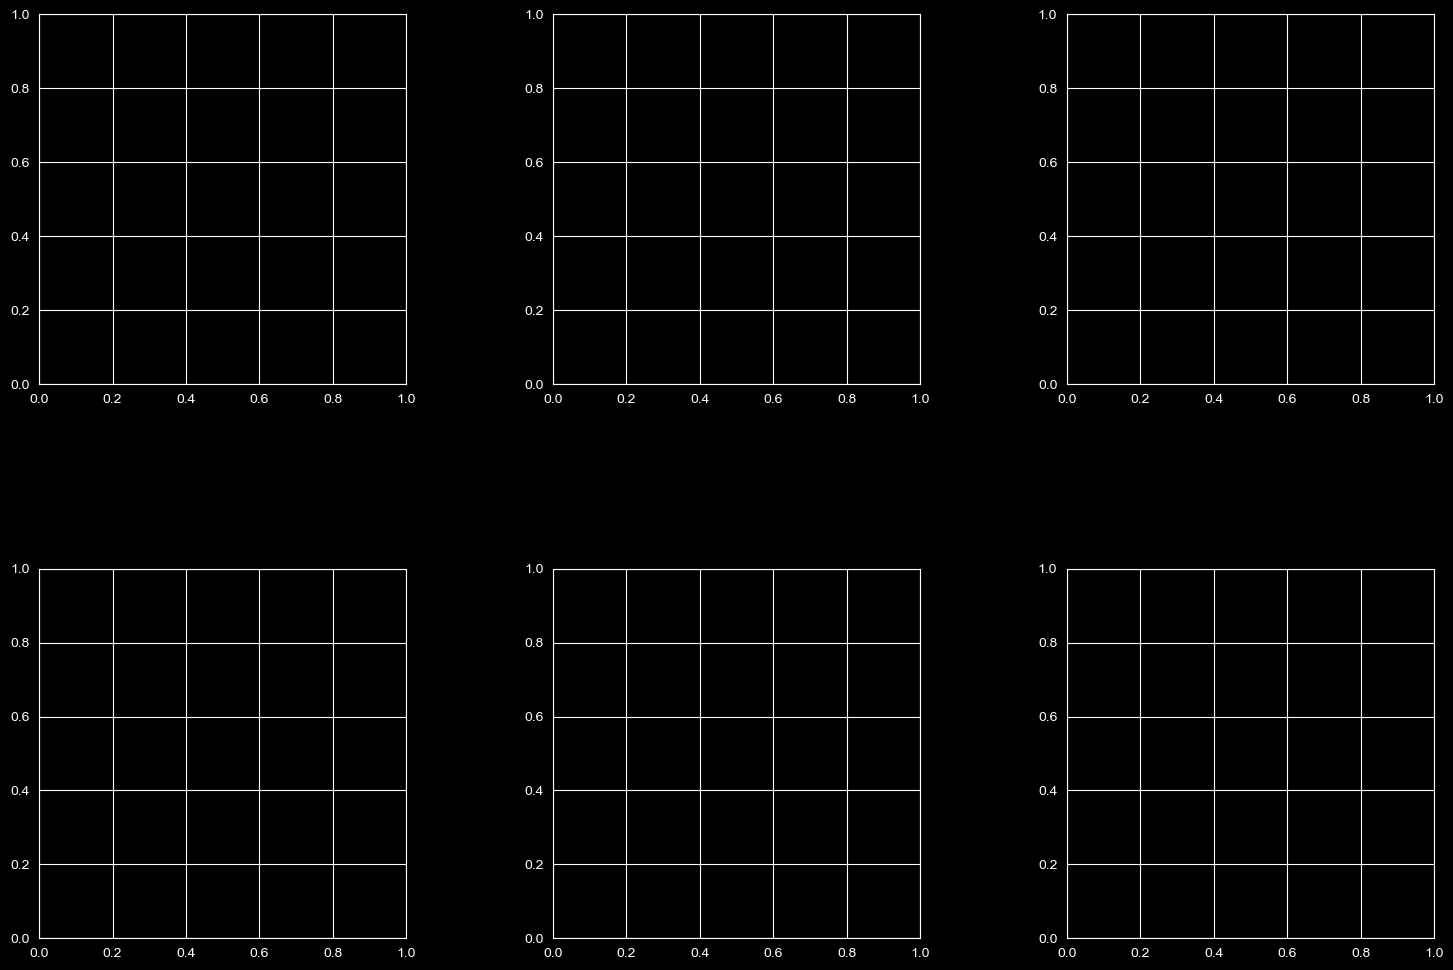

In [306]:
  # 生成可视化
fig = plot_model_evaluation(
    model=rf,
    X=X_VAL,
    y=y_test,
    class_names=['Class 0', 'Class 1'],
    feature_names=[f'Feature_{i}' for i in range(20)],
    figsize=(18, 12)
)

plt.show()

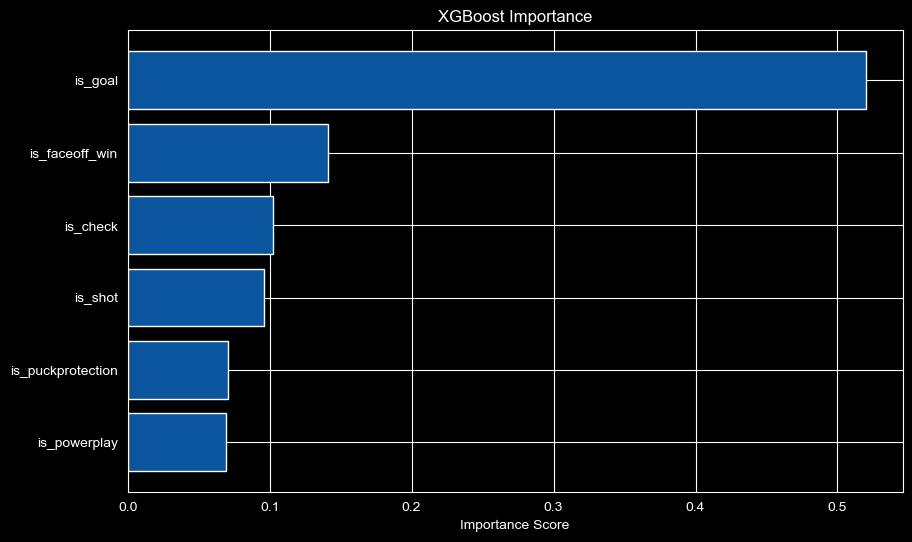

In [287]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    scale_pos_weight=0.7,  # 对应 home_win=1 是 0 的两倍
    max_depth=5,
    learning_rate=0.1,
    n_estimators=50,
    random_state=42
)
xgb.fit(X_resampled, y_resampled)
feature_importance = xgb.feature_importances_
# 创建DataFrame（假设 X 的列名为特征名称）
df_importance = pd.DataFrame({
    '特征': X.columns,
    '重要性': feature_importance
}).sort_values('重要性', ascending=False)

# 绘制条形图
plt.figure(figsize=(10, 6))
plt.barh(df_importance['特征'], df_importance['重要性'])
plt.xlabel('Importance Score')
plt.title('XGBoost Importance')
plt.gca().invert_yaxis()  # 重要性从高到低显示
plt.show()



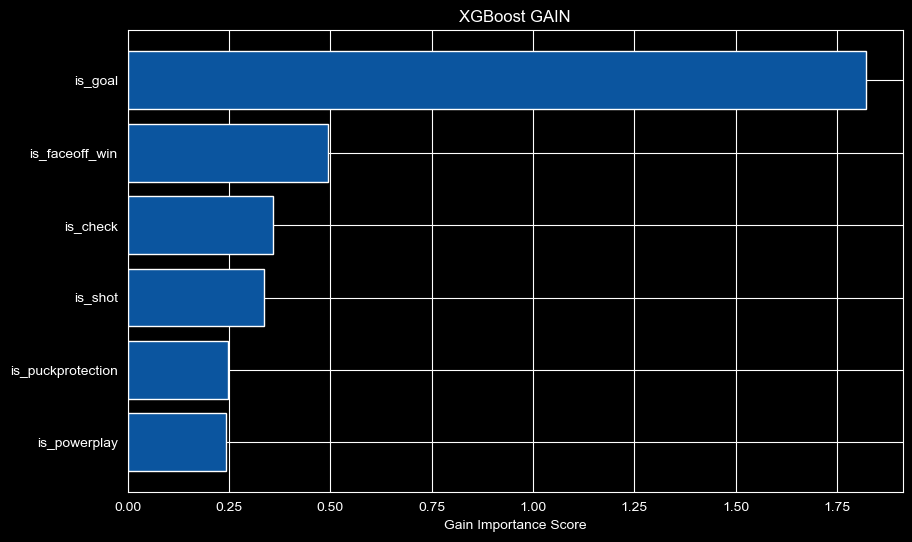

In [288]:
# 获取不同重要性类型的值
importance_types = ['weight', 'gain', 'cover']
importance_dict = {}

for imp_type in importance_types:
    importance_dict[imp_type] = xgb.get_booster().get_score(importance_type=imp_type)

# 确保特征名称是字符串
df_importance['特征'] = df_importance['特征'].astype(str)
importance_dict['gain'] = {str(k): v for k, v in importance_dict['gain'].items()}

# 按特征顺序对齐
gain_series = pd.Series(importance_dict['gain']).reindex(df_importance['特征']).fillna(0)

# 绘制条形图
plt.figure(figsize=(10, 6))
plt.barh(gain_series.index, gain_series.values)
plt.xlabel('Gain Importance Score')
plt.title('XGBoost GAIN')
plt.gca().invert_yaxis()
plt.show()

In [289]:
# import shap
# 
# explainer = shap.TreeExplainer(xgb)
# shap_values = explainer.shap_values(X)
# 
# # 可视化单个样本的特征影响
# shap.force_plot(explainer.expected_value[1], shap_values[1][0], X.iloc[0])

In [290]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5)
for model in [lr, rf, xgb]:
    scores = cross_val_score(model, X_resampled, y_resampled, cv=skf, scoring='roc_auc')
    print(f"{model.__class__.__name__} AUC: {scores.mean():.3f}")

LogisticRegression AUC: 0.682
RandomForestClassifier AUC: 0.683
XGBClassifier AUC: 0.677


In [291]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split



# 训练并验证
model = rf
model.fit(X_train, y_train)
y_pred = model.predict(X_val)

print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.38      0.23      0.29        13
           1       0.55      0.71      0.62        17

    accuracy                           0.50        30
   macro avg       0.46      0.47      0.45        30
weighted avg       0.47      0.50      0.47        30



In [292]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# 定义基模型（决策树）
base_model = DecisionTreeClassifier(
    max_depth=6, 
    class_weight={0:1.65, 1:1}, 
    random_state=42
)

# Bagging集成（10个基模型）
bagging_model = BaggingClassifier(
    estimator=base_model,
    n_estimators=20,
    max_samples=0.8,
    bootstrap=True,
    n_jobs=1,  # 禁用并行（避免多线程随机性）
    bootstrap_features=False,  # 禁用特征子集采样（可选）
    random_state=42  # 固定Bagging整体随机种子
)

# 训练与评估
bagging_model.fit(X_train, y_train)
scores = cross_val_score(bagging_model, X_train, y_train, cv=5, scoring='f1')
print(f"Bagging F1均值: {scores.mean():.3f} (±{scores.std():.3f})")

Bagging F1均值: 0.570 (±0.092)


In [293]:
import pandas as pd

# 合并真实标签和预测标签
results_df = pd.DataFrame({
    '真实标签': y_train,
    '预测标签': bagging_model.predict(X_train)
})

# 按类别分组统计
print(results_df.groupby(['真实标签', '预测标签']).size().unstack(fill_value=0))


results_df = pd.DataFrame({
    '真实标签': y_val,
    '预测标签': bagging_model.predict(X_val)
})

# 按类别分组统计
print(results_df.groupby(['真实标签', '预测标签']).size().unstack(fill_value=0))

预测标签   0   1
真实标签        
0     39  13
1     15  53
预测标签  0   1
真实标签       
0     4   9
1     6  11


In [294]:
X_resampled

,is_powerplay,is_check,is_shot,is_goal,is_faceoff_win,is_puckprotection
0,1.0,-1.000000,-1.000000,1.0,-1.000000,-1.0
1,-1.0,1.000000,-1.000000,-1.0,-1.000000,-1.0
2,-1.0,-1.000000,1.000000,-1.0,1.000000,1.0
3,-1.0,1.000000,1.000000,1.0,1.000000,-1.0
4,-1.0,1.000000,-1.000000,1.0,-1.000000,-1.0
...,...,...,...,...,...,...
131,1.0,-1.000000,1.000000,-1.0,1.000000,1.0
132,1.0,-0.184829,-0.184829,1.0,-1.000000,-1.0
133,1.0,0.907099,-1.000000,-1.0,1.000000,1.0
134,1.0,-1.000000,-1.000000,-1.0,-1.000000,1.0


In [295]:
vec_first_event

,gameid,teamid,is_offside,is_powerplay,is_check,is_shot,is_goal,is_faceoff_win,is_lpr_win,is_puckprotection,is_controlledentryagainst,is_penaltydrawn,is_home_game
0,60062,634.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,home
1,60062,855.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,away
2,60116,503.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,home
3,60116,869.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,away
4,60266,686.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,home
...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,89459,814.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,away
303,89459,869.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,home
304,89764,792.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,home
305,89764,855.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,away


In [296]:
vec_first_event

,gameid,teamid,is_offside,is_powerplay,is_check,is_shot,is_goal,is_faceoff_win,is_lpr_win,is_puckprotection,is_controlledentryagainst,is_penaltydrawn,is_home_game
0,60062,634.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,home
1,60062,855.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,away
2,60116,503.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,home
3,60116,869.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,away
4,60266,686.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,home
...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,89459,814.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,away
303,89459,869.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,home
304,89764,792.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,home
305,89764,855.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,away


first offside win the game rate:0.41, draw in the competition: 0.22, loss rate: 0.37, win number:63,lose number:57, draw number:34,total number:154
first check win the game rate:0.45, draw in the competition: 0.22, loss rate: 0.33, win number:70,lose number:52, draw number:34,total number:156
first powerplay win the game rate:0.37, draw in the competition: 0.21, loss rate: 0.42, win number:57,lose number:65, draw number:32,total number:154
first goal win the game rate:0.54, draw in the competition: 0.22, loss rate: 0.24, win number:85,lose number:37, draw number:34,total number:156
first shot win the game rate:0.47, draw in the competition: 0.22, loss rate: 0.31, win number:74,lose number:48, draw number:34,total number:156
first faceoff win the game rate:0.40, draw in the competition: 0.22, loss rate: 0.38, win number:62,lose number:59, draw number:34,total number:155
first puckprotection win the game rate:0.38, draw in the competition: 0.22, loss rate: 0.40, win number:59,lose number

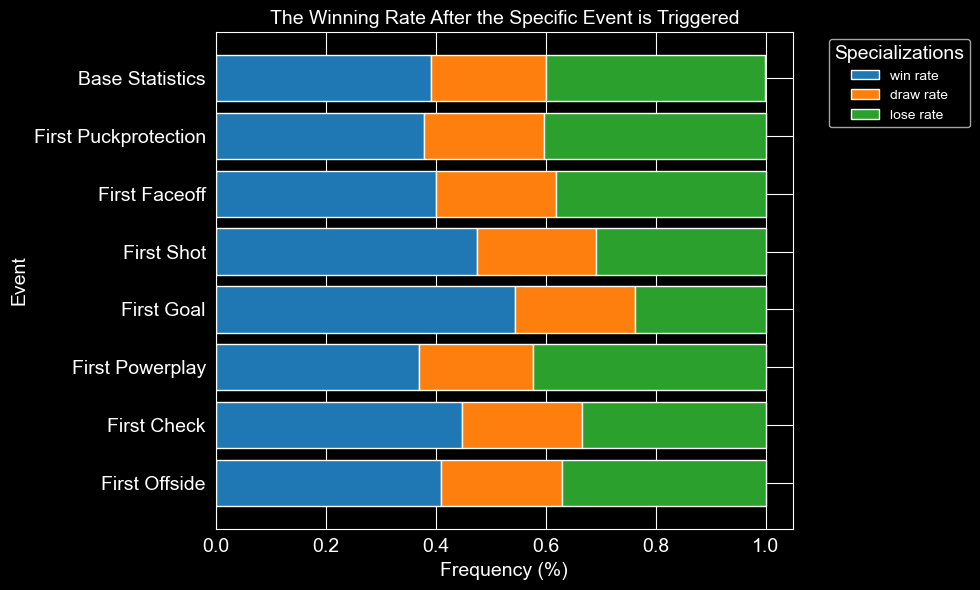

In [297]:
import matplotlib.pyplot as plt
    
def calculate_first_win_rate(df,col):
    win_number = len(df[(df['teamid'] == df['winnerid']) & (df['is_pin'] == False)])
    lose_number = len(df[(df['teamid'] != df['winnerid']) & (df['is_pin'] == False)])
    pin_number = len(df[df['is_pin'] == True])
    win_rate = win_number / len(df['gameid'].unique().tolist())
    pin_rate = pin_number / len(df['gameid'].unique().tolist())
    lose_rate = 1 - win_rate - pin_rate
    print("first {} win the game rate:{:.2f}, draw in the competition: {:.2f}, loss rate: {:.2f}, win number:{},lose number:{}, draw number:{},total number:{}".format(col,win_rate,pin_rate, lose_rate,win_number,lose_number, pin_number,len(df['gameid'].unique().tolist())))
    return pd.DataFrame([{'event':'first_' +col, 'win number': win_number, 'draw number': pin_number, 'total game number': len(df['gameid'].unique().tolist()),'win rate': win_rate, 'draw rate': pin_rate, 'lose rate': lose_rate}])
    
add_winner_label(first_offside)
add_winner_label(first_check)
add_winner_label(first_shot)
add_winner_label(first_goal)
add_winner_label(first_faceoff_win)
add_winner_label(first_puckprotection)
add_winner_label(first_controlledentryagainst)
add_winner_label(first_lpr_win)
add_winner_label(first_powerplay)

foffside_stat_df = calculate_first_win_rate(first_offside,'offside')
fcheck_stat_df =calculate_first_win_rate(first_check,'check')
fpowerplay_stat_df = calculate_first_win_rate(first_powerplay,'powerplay')
fgoal_stat_df = calculate_first_win_rate(first_goal,'goal')
fshot_stat_df = calculate_first_win_rate(first_shot,'shot')
ffaceoff_stat_df = calculate_first_win_rate(first_faceoff_win,'faceoff')
fpuckptet_stat_df = calculate_first_win_rate(first_puckprotection,'puckprotection')
fcea_stat_df = calculate_first_win_rate(first_controlledentryagainst,'controlledentryagainst')
flpr_stat_df = calculate_first_win_rate(first_lpr_win,'lpr')


# 0.40058582721626207
# 0.40129164313946925
# 0.19812252964426874

average_stat_df = pd.DataFrame([{'win rate':0.391,'draw rate':0.21,'lose rate':0.397}])
fevent_stat_df = pd.concat([foffside_stat_df, fcheck_stat_df, fpowerplay_stat_df,fgoal_stat_df,fshot_stat_df,ffaceoff_stat_df,fpuckptet_stat_df], axis=0).reset_index()
levels = ["First Offside",'First Check','First Powerplay','First Goal','First Shot','First Faceoff','First Puckprotection','Base Statistics'] 

display_columns = ['win rate','draw rate','lose rate']
n_specs = len(display_columns)
np.random.seed(42)
display_data = fevent_stat_df.iloc[:, -3:] 
display_data = pd.concat([display_data, average_stat_df], axis=0)
fig, ax = plt.subplots(figsize=(10, 6))

left = np.zeros(len(levels))
colors = plt.cm.tab10.colors  
 
for i in range(n_specs):
    ax.barh(levels, display_data.iloc[:,i ], left=left, color=colors[i % len(colors)],label=display_columns[i])
    left += display_data.iloc[:, i]

# 调整字体大小的关键修改 ↓↓↓
ax.set_title("The Winning Rate After the Specific Event is Triggered", fontsize=14)  # 标题字体
ax.set_xlabel("Frequency (%)", fontsize=14)                            # X轴标签字体
ax.set_ylabel("Event", fontsize=14)                                         # Y轴标签字体（如果存在）
ax.tick_params(axis='both', which='major', labelsize=14)                    # 刻度标签字体
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', 
          title="Specializations", title_fontsize=14, fontsize=10)    
plt.tight_layout()
plt.show()

In [298]:
each_game_df = hy.sort_values(['gameid','teamid']).groupby(['gameid','teamid'],as_index=False).first()[['gameid', 'teamid']]
each_game_df[['winnerid','is_pin','loserid']] = each_game_df.apply(add_label,axis=1, result_type='expand')



In [299]:
#计算每个队伍的平均胜率是多少
print('total team number:', len(each_game_df['teamid'].unique().tolist()))
# each_game_df.drop_duplicates(['gameid'], inplace=True)
win_counts = each_game_df[(each_game_df['is_pin'] == False) & (each_game_df['teamid'] == each_game_df['winnerid'])]['winnerid'].value_counts().reset_index()
draw_counts = each_game_df[each_game_df['is_pin'] == True]['teamid'].value_counts().reset_index()

lose_counts = each_game_df[(each_game_df['is_pin'] == False) & (each_game_df['teamid'] != each_game_df['winnerid'])]['loserid'].value_counts().reset_index()





total team number: 14


In [300]:
res_detail_df= win_counts.merge( draw_counts, 
    left_on='winnerid', 
    right_on='teamid', 
    how='outer' )
res_detail_df.drop(columns=['winnerid'], inplace=True)
res_detail_df = res_detail_df.rename(columns={'count_x': 'win_number', 'count_y': 'draw_number'})
res_detail_df = res_detail_df.merge(lose_counts,left_on='teamid', 
    right_on='loserid', 
    how='outer' )
res_detail_df['win_rate'] = res_detail_df['win_number'] / (res_detail_df['win_number'] + res_detail_df['draw_number'] + res_detail_df['count'])
res_detail_df['lose_rate'] = res_detail_df['count'] / (res_detail_df['win_number'] + res_detail_df['draw_number'] + res_detail_df['count'])
res_detail_df['draw_rate'] = res_detail_df['draw_number'] / (res_detail_df['win_number'] + res_detail_df['draw_number'] + res_detail_df['count'])
res_detail_df



,win_number,teamid,draw_number,loserid,count,win_rate,lose_rate,draw_rate
0,8,503,5,503,9,0.363636,0.409091,0.227273
1,9,524,6,524,8,0.391304,0.347826,0.260870
2,11,628,5,628,7,0.478261,0.304348,0.217391
3,7,634,6,634,9,0.318182,0.409091,0.272727
4,11,686,3,686,8,0.500000,0.363636,0.136364
5,10,726,3,726,9,0.454545,0.409091,0.136364
6,3,792,3,792,16,0.136364,0.727273,0.136364
7,6,795,5,795,11,0.272727,0.500000,0.227273
8,10,814,6,814,6,0.454545,0.272727,0.272727
9,8,825,7,825,7,0.363636,0.318182,0.318182


In [301]:
print(res_detail_df['win_rate'].mean())
print(res_detail_df['lose_rate'].mean())
print(res_detail_df['draw_rate'].mean())

0.391116130246565
0.3915513833992095
0.21733248635422542


In [302]:
#获取所有比赛第一次powerplay的数据
def get_powerplay_status(group):
    """
    为每个队伍在每场比赛中跟踪powerplay状态
    返回每个事件的状态标记（1=开始，-1=结束，0=持续）
    """
    status = 0
    powerplay_team = None
    status_list = []
    for index, row in group.iterrows():
        gameid = row['gameid']
        current = row['manpowersituation'].lower()
        team_id = row['teamid']
        # 检测powerplay开始（当前队伍进入powerplay）
        if current == 'powerplay' and powerplay_team is None:
            powerplay_team = team_id
            status = 1
            status_list.append(1)       
        # 检测powerplay结束（当前队伍退出powerplay）
        elif current != 'powerplay' and status == 1 and powerplay_team == team_id:
            powerplay_team = 'checked'
            status = 0
            status_list.append(-1)  
        # 持续状态或无关队伍
        else:
            status_list.append(status)
    return status_list


grouped = hy.groupby(['gameid'])
res = pd.DataFrame()
for grp in grouped:
    grp_data = grp[1].copy()
    processed_grp = get_powerplay_status(grp[1])
    grp_data['pp_status'] = processed_grp
    res = pd.concat([res, grp_data], ignore_index=True)
f_powerplay = res[res['pp_status'] == 1]
f_powerplay

In [303]:
shorthand_xg = f_powerplay[(f_powerplay['manpowersituation'] == 'shortHanded') & (f_powerplay['eventname']=='shot')]['xg_allattempts']
print("再第一次powerplay期间，shorthand队伍shot的平均xG是：", f_powerplay[(f_powerplay['manpowersituation'] == 'shortHanded') & (f_powerplay['eventname']=='shot')]['xg_allattempts'].mean())

print("再第一次powerplay期间，powerplay队伍shot的平均xG是：",f_powerplay[(f_powerplay['manpowersituation'] == 'powerPlay') & (f_powerplay['eventname']=='shot')]['xg_allattempts'].mean())

NameError: name 'f_powerplay' is not defined

In [ ]:
#第一次powerplay取得进球的球队的胜率
first_pwp_goal = res[(res['eventname'] == 'goal') & (res['pp_status'] == 1) & (res['manpowersituation'] == 'powerPlay')]
def add_label(row):
    current_gameid = row['gameid']
    winner = common.get_winner(hy, current_gameid)
    is_pin = True if winner[2] is False else False
    winnerid = winner[0] if winner[2] is True else winner[1]
    loserid = winner[1] if winner[2] is True else winner[0]
    return [winnerid,is_pin,loserid]

def add_winner_label(df):
    df['winnerid'] = None
    df['is_pin'] = None
    df['loserid'] = None
    df[['winnerid','is_pin','loserid']] = df.apply(add_label,axis=1, result_type='expand')
    return df
add_winner_label(first_pwp_goal)
print("goal in first powerplay , win rate is :",len(first_pwp_goal[first_pwp_goal['teamid'] == first_pwp_goal['winnerid']]) / len(first_pwp_goal['gameid'].unique().tolist()))
print("goal in first powerplay , lose rate is :",len(first_pwp_goal[first_pwp_goal['teamid'] == first_pwp_goal['loserid']]) / len(first_pwp_goal['gameid'].unique().tolist()))
first_pwp_goal

In [ ]:
#分析第一次powerplay期间的抢球距离

player_covered_distance = res[
    ['gameid', 'teamid', 'playerid', 'eventname', 'manpowersituation','xadjcoord', 'yadjcoord', 'outcome', 'pp_status','playerprimaryposition']]
player_covered_distance['n_eventname'] = player_covered_distance['eventname'].shift(-1)
player_covered_distance['nn_eventname'] = player_covered_distance['n_eventname'].shift(-1)
player_covered_distance['nnn_eventname'] = player_covered_distance['nn_eventname'].shift(-1)

player_covered_distance['n_playerid'] = player_covered_distance['playerid'].shift(-1)
player_covered_distance['nn_playerid'] = player_covered_distance['n_playerid'].shift(-1)
player_covered_distance['nnn_playerid'] = player_covered_distance['nn_playerid'].shift(-1)

player_covered_distance['n_teamid'] = player_covered_distance['teamid'].shift(-1)
player_covered_distance['nn_teamid'] = player_covered_distance['n_teamid'].shift(-1)
player_covered_distance['nnn_teamid'] = player_covered_distance['nn_teamid'].shift(-1)

player_covered_distance['n_outcome'] = player_covered_distance['outcome'].shift(-1)
player_covered_distance['nn_outcome'] = player_covered_distance['n_outcome'].shift(-1)
player_covered_distance['nnn_outcome'] = player_covered_distance['nn_outcome'].shift(-1)
# lpr_dumpout_lpr = player_covered_distance[(player_covered_distance['eventname']=='lpr') &
#                                           (player_covered_distance['n_eventname']=='dumpout') & 
#                                             (player_covered_distance['nn_eventname']=='lpr') ]       
# 
# lpr_dumpout_block_lpr = player_covered_distance[(player_covered_distance['eventname']=='lpr') &
#                                           (player_covered_distance['n_eventname']=='dumpout') & 
#                                             (player_covered_distance['nn_eventname']=='block') &
#                                             (player_covered_distance['nnn_eventname']=='lpr')]  
player_covered_distance = player_covered_distance.reset_index()


def get_last_lpr_playerids(row,last_lpr_player_list,pp=False,first_pp=False):
    if first_pp and pp:
        raise Exception("wrong parameters")
    gameid = row['gameid']
    teamid = row['teamid']
    eventname = row['eventname']
    outcome = row['outcome']
    #符合上述的sequence , 计算最后接球运动员与最后一次出现时的距离,第一次lpr是成功的，最后可能有几个lpr,成功的lpr来自对手队伍
    if first_pp is True and (row['pp_status'] != 1 or row['manpowersituation'] != 'shortHanded'):
        return
    if eventname == 'dumpout' and outcome == 'successful':
        if pp is True and row['manpowersituation'] != 'shortHanded':
            return
        index = row.name
        end_index = index + 3 if index + 3 < len(player_covered_distance) else len(player_covered_distance) -1
        nearest_lpr_series = player_covered_distance.iloc[index:end_index].query("eventname == 'lpr'")
        if len(nearest_lpr_series) > 0:
            succ_nearest_lpr = nearest_lpr_series[(nearest_lpr_series['teamid'] != teamid) & (nearest_lpr_series['outcome'] == 'successful') & (nearest_lpr_series['gameid'] == gameid)]
            # the nearest lpr is should be the powerplay if pp = True
            succ_nearest_lpr = succ_nearest_lpr[succ_nearest_lpr['manpowersituation'] == 'powerPlay'] if first_pp is True or pp is True else succ_nearest_lpr
            if len(succ_nearest_lpr) > 0:
                nearest_lpr = succ_nearest_lpr.iloc[0]
                #如果是守门员，直接返回，不计入球员跑动距离
                if nearest_lpr['playerprimaryposition'] == 'G':
                    return
                nearest_lpr['dumpout_index'] = index
                last_lpr_player_list.extend([nearest_lpr.to_dict()])

def calculate_player_covered_distance(df,first_pp=False,pp=False):
    last_lpr_player_list = list()
    player_covered_distance.apply(get_last_lpr_playerids, axis=1,args=(last_lpr_player_list,pp,first_pp))
    last_lpr_player_df = pd.DataFrame(last_lpr_player_list)
    df_copy = last_lpr_player_df.copy()[['gameid','playerid','index']]
    merged_player_df = df_copy.merge(df, on=['gameid', 'playerid'], how='left')
    merged_player_df['prev_x'] = merged_player_df['xadjcoord'].shift(1)
    merged_player_df['prev_y'] = merged_player_df['yadjcoord'].shift(1)
    merged_player_df = merged_player_df[merged_player_df['index_x'] == merged_player_df['index_y']]
    merged_player_df['covered_dis'] = np.sqrt((merged_player_df['prev_x'] - merged_player_df['xadjcoord'])**2 + (merged_player_df['prev_y'] - merged_player_df['yadjcoord'])**2)
    return merged_player_df

distance_df = calculate_player_covered_distance(player_covered_distance)  
first_pp_distance_df = calculate_player_covered_distance(player_covered_distance,first_pp=True)  
pp_distance_df = calculate_player_covered_distance(player_covered_distance,pp=True)  

print('dumpout平均跑动距离:', distance_df['covered_dis'].mean())
print('first pp dumpout平均跑动距离:', first_pp_distance_df['covered_dis'].mean())
print('pp dumpout平均跑动距离:', pp_distance_df['covered_dis'].mean())


